<a href="https://colab.research.google.com/github/jafiorucci/CEE2PY125/blob/main/13_pandas_parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas - Parte 3

## Séries temporais

*Pandas* é uma das principais bibliotecas utilizadas para manipulação de séries temporais por possuir diversas funcionalidades úteis para esse tipo de dados.

Em *Pandas* uma série temporal é representada por um objeto do tipo `Series` ou `DataFrame` indexadas por um tipo de objeto especifico para trabalhar com datas, o `datetime`.

  **Objetos `datetime` no Python**

  A biblioteca `datetime` do Python é utilizado para manipular datas e horários. Ela fornece várias classes úteis para criar, modificar, comparar e realizar cálculos com datas e tempos.

  Principais Classes do Módulo `datetime`:

  * `datetime.date`: Representa uma data (ano, mês e dia).
  * `datetime.time`: Representa um horário (hora, minuto, segundo e microssegundo).
  * `datetime.datetime`: Combina data e horário.
  * `datetime.timedelta`: Representa diferenças entre datas ou tempos.
  * `datetime.tzinfo` e `datetime.timezone`: Representam informações de fuso horário

In [ ]:
## Exemplos datetime

import datetime

# Objeto date:
  ## Criando uma data
data = datetime.date(2024, 11, 29)
print(type(data))
print("\nData Criada:", data)

  ## Acessando componentes
print("Ano:", data.year)
print("Mês:", data.month)
print("Dia:", data.day)

# Objeto time:
  ## Criando um horário
horario = datetime.time(14, 30, 45)
print("\n\n", type(horario))
print("\nHorário Criado:", horario)

  ## Acessando componentes
print("Hora:", horario.hour)
print("Minuto:", horario.minute)
print("Segundo:", horario.second)

# Objeto datetime:
  ## Criando um objeto datetime
data_hora = datetime.datetime(2024, 11, 29, 14, 30, 45)
print("\n\n", type(data_hora))
print("\nData e Hora Criadas:", data_hora)

  ## Acessando componentes
print("Ano:", data_hora.year)
print("Hora:", data_hora.hour)

In [ ]:
# Convertendo string para date, time ou datetime

# Principais códigos de formatação:
# %Y: Ano com quatro dígitos.
# %m: Mês (01-12).
# %d: Dia do mês (01-31).
# %H: Hora (00-23).
# %M: Minuto (00-59).
# %S: Segundo (00-59).

## Exemplo 1
data_string = "29/11/2024"

data_convertida = datetime.datetime.strptime(data_string, "%d/%m/%Y")
print("String Convertida para datetime:", data_convertida)
print("String Convertida para date:", data_convertida.date())


## Exemplo 2
data_string = "29/11/2024 14:30:45"
data_convertida = datetime.datetime.strptime(data_string, "%d/%m/%Y %H:%M:%S")
print("\n\nString Convertida para datetime:", data_convertida)
print("String Convertida para date:", data_convertida.date())
print("String Convertida para time:", data_convertida.time())

**1. Criando Séries Temporais**

Podemos criar séries temporais usando o `pd.date_range()` e trabalhar diretamente com objetos `datetime`.

In [ ]:
import pandas as pd
import numpy as np


####### serie diaria ###########################################################

# Gerando uma sequência de dias
dias = pd.date_range(start="2023-01-02", end="2023-01-20", freq="D")
print("Sequência de dias:\n", dias)

# Criando uma série temporal diária
serie_diaria = pd.Series(np.random.randint(1, 100, len(dias)), index=dias)
print("\nSérie diaria:\n", serie_diaria)

################################################################################

####### serie semanal ##########################################################

# Gerando uma sequência de semanas
semanas = pd.date_range("2023-01-01", "2023-03-01", freq="W")

# Criando uma série temporal semanal
serie_semanal = pd.Series(np.random.randint(1, 100, len(semanas)), index=semanas)
print("\nSérie semanal:\n", serie_semanal)

################################################################################

####### serie horária ##########################################################

# Frequência por horas
horas = pd.date_range("2023-01-01", "2023-01-02", freq="h")

# Criando uma série temporal horaria
serie_horaria = pd.Series(np.random.randint(1, 100, len(horas)), index=horas)
print("\nSérie horaria:\n", serie_horaria)

################################################################################


**2. Manipulando Datas como Índices**

As colunas de datas ou índices permitem acessar, filtrar e realizar operações.

In [ ]:
# Filtrando dados específicos
print("Valores de 2023-01-03 a 2023-01-05:\n", serie_diaria["2023-01-03":"2023-01-05"])

# Selecionando com base em condições
print("\nValores maiores que 50:\n", serie_diaria[serie_diaria > 50])


**4. Reamostragem e Alteração de Frequência**

A reamostragem ajusta a frequência temporal dos dados (e.g., diário para mensal).

In [ ]:
# Seria diaria
print("serie diaria:\n", serie_diaria )

# Reamostragem para frequência semanal
reamostrado = serie_diaria.resample("W")

## media dos valores
print("\nSerie Semanal (media):\n", reamostrado.mean())

## soma dos valores
print("\nSerie Semanal (soma):\n", reamostrado.sum())

## maximo dos valores
print("\nSerie Semanal (max):\n", reamostrado.max())

**5. Operações de Deslocamento**

O deslocamento temporal é útil em diversas situações. Por exemplo, a construção de modelo de regressão pode utilizar uma variável defasada (Ex: Taxa_desemprego ~ Selic_defasada).

In [ ]:
serie = serie_diaria["2023-01-02":"2023-01-08"]
print("serie diaria:\n", serie)

# Deslocando os valores para frente
deslocado1 = serie.shift(1)
print("\nSérie Deslocada para Frente:\n", deslocado1)

# Deslocando os valores para trás
deslocado2 = serie.shift(-1)
print("\nSérie Deslocada para trás:\n", deslocado2)

# Calculando diferenças
diferencas = serie.diff()
print("\nDiferenças Entre Valores Consecutivos:\n", diferencas)

**6. Trabalhando com Timezones**

O Pandas suporta fuso horário com `tz_localize` e `tz_convert`.

In [ ]:
import numpy as np
import pandas as pd

# Criando uma série temporal horária (UTC)
horas_utc = pd.date_range("2023-01-01 07:00", "2023-01-01 12:00", freq="h", tz="UTC")
serie_horaria_utc = pd.Series(np.random.randint(1, 100, len(horas_utc)), index=horas_utc)

print("Série horária no timezone UTC:")
print(serie_horaria_utc)

# Convertendo para o timezone América/São_Paulo
serie_horaria_sao_paulo = serie_horaria_utc.tz_convert("America/Sao_Paulo")
print("\nSérie horária convertida para América/São_Paulo:")
print(serie_horaria_sao_paulo)

# Série sem fuso horário
horas_sem_tz = pd.date_range("2023-01-01 07:00", "2023-01-01 12:00", freq="h")
serie_sem_tz = pd.Series(np.random.randint(1, 100, len(horas_sem_tz)), index=horas_sem_tz)

# Adicionando timezone à série sem fuso horário
serie_com_tz = serie_sem_tz.tz_localize("America/New_York")
print("\nSérie sem timezone adicionada ao timezone América/New_York:")
print(serie_com_tz)


Os fusos horários disponíveis podem ser acessados em [time-zones](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones).

**7. Gráfico de séries temporais**

No Pandas, é possível criar gráficos de séries temporais de forma simples utilizando o método `.plot()` integrado. Ele é ideal para representar visualmente dados temporais, como tendências ao longo do tempo. Para isso, você pode usar diretamente o DataFrame ou a Series, desde que tenham um índice temporal.

> Quando você usa o método .plot() em um objeto do pandas (por exemplo, um DataFrame ou Series), ele retorna um objeto `matplotlib.axes._axes.Axes`, que faz parte da biblioteca matplotlib. Esse objeto representa o eixo do gráfico e permite manipulações adicionais, como adicionar título, rótulos, etc.

> Em Colab (ou Jupyter), quando você chama `plot()` o gráfico é exibido automaticamente.


In [ ]:
import pandas as pd
import numpy as np

# Gerar uma série temporal horaria
datas = pd.date_range("2023-01-01", "2023-01-5", freq="h")
valores = np.random.randint(50, 100, len(datas))
serie_temporal = pd.Series(valores, index=datas)

# Criar o gráfico
fig = serie_temporal.plot(title="Série Temporal", xlabel="Data", ylabel="Valor",
                    figsize=(6, 3))

In [ ]:
# Gera um DataFrame com múltiplas séries temporais
df = pd.DataFrame({
    "Produto A": np.random.randint(50, 100, len(datas)),
    "Produto B": np.random.randint(60, 120, len(datas)),
    "Produto C": np.random.randint(30, 90, len(datas)),
}, index=datas)

# Gera o gráfico
fig = df.plot(title="Comparação de Produtos", xlabel="Data", ylabel="Vendas",
        figsize=(7, 4))

A biblioteca `matplotlib` pode ser utilizada para personalizar os gráficos. Será visto a frente.

### Exercício 1

Considere o seguinte código:

```python
import pandas as pd
import numpy as np

# Série temporal diária para janeiro de 2023
dias = pd.date_range(start="2023-01-01", end="2023-01-31", freq="D")
serie = pd.Series(np.random.randint(10, 100, len(dias_janeiro)), index=dias)
print("Série Temporal:\n", serie)
```

Então para o objeto `serie`:

1. Construa uma série semanal tomando os valores máximos de cada semana.

2. Construa uma série semanal tomando os valores médios de cada semana.

3. Inclua o fuso horário "America/Sao_Paulo".

4. Apresente o gráfico das duas séries temporais.

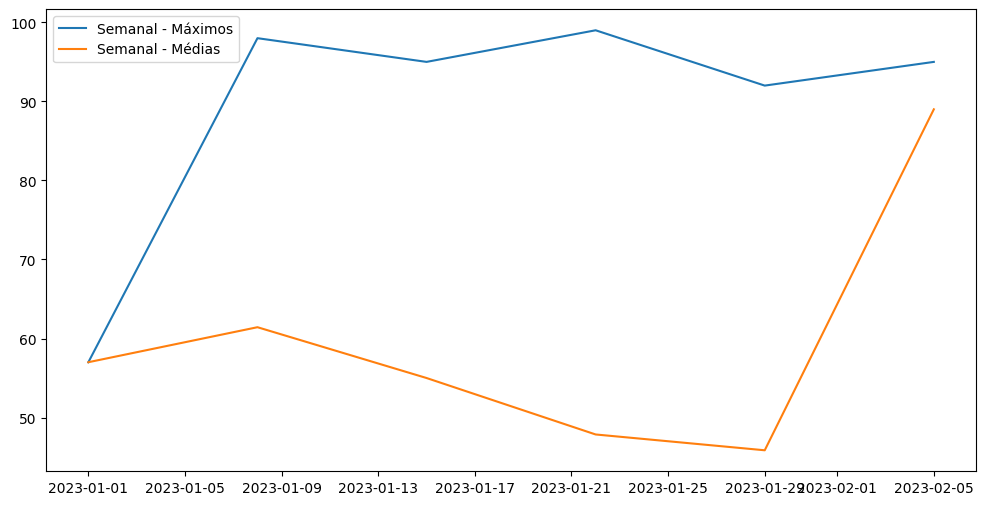

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Série temporal diária para janeiro de 2023
dias_janeiro = pd.date_range(start="2023-01-01", end="2023-01-31", freq="D")
serie = pd.Series(np.random.randint(10, 100, len(dias_janeiro)), index=dias_janeiro)
# print("Série Temporal:\n", serie)

# 1.
maximos = serie.resample("W").max()
# print("\nMáximos Semanais:\n", maximos)

# 2.
medias = serie.resample("W").mean()
# print("\nMédias Semanais:\n", medios)

# 3.
serie_tz_sp = serie.tz_localize("America/Sao_Paulo")
# print("\nSérie Temporal com Fuso Horário:\n", serie_tz_sp)

# 4.
plt.figure(figsize=(12,6))

plt.plot(maximos, label='Semanal - Máximos')
plt.plot(medias, label='Semanal - Médias')
plt.legend()
plt.show()

## Dados categorizados

Os dados categorizados são úteis para representar variáveis que têm um número fixo e limitado de categorias. O *Pandas* oferece suporte para o tipo de dado `category`, permitindo economizar memória e melhorar o desempenho em operações com dados categóricos.

> `category` em *Pandas* é o equivalente ao `factor` na linguagem R.

Por que usar dados categorizados?

* Eficiência de memória: Categorias são armazenadas como índices inteiros internamente, reduzindo o uso de memória.

* Desempenho: Operações como comparação e agrupamento são mais rápidas.

* **Modelagem**: Modelos de regressão não lidam diretamente com variáveis categóricas. Elas precisam ser convertidas em uma representação numérica, como **one-hot encoding** (cada categoria vira uma coluna binária) ou codificação **ordinal** (são tratadas como números).  


**Criando Dados Categorizados**

In [ ]:
import pandas as pd
import numpy as np

## A partir de uma lista
categoricas = pd.Series(["Alto", "Médio", "Baixo", "Médio"], dtype="category")
print("Série categórica:")
print(categoricas)  # Aqui o Python não sabe qual é a ordem

# Definindo uma ordem explícita (ordinal)
categoricas2 = categoricas.cat.set_categories(["Baixo", "Médio", "Alto"],
                                             ordered=True)
print("\nSérie categórica ordenada:")
print(categoricas2)


Segmentando variáveis utilizando `.cut`

In [ ]:
df = pd.DataFrame({
    "Nome": ["Ana", "Bruno", "Carlos", "Diana", "Eduardo"],
    "Gênero": ["Feminino", "Masculino", "Masculino", "Feminino", "Masculino"],
    "Notas": [9.5, 5.3, 0.1, 6.1, 7.7]
})

# Aplicando a função .cut para criar a coluna menção
cortes = [0.0, 3.0, 5, 7, 9, 10]
classes = ["II","MI","MM","MS","SS"]
df['Menção'] = pd.cut( df['Notas'], bins=cortes, labels=classes )

# Transformando Menção em categorica
df["Menção"] = df["Menção"].astype("category")

# Transformando Menção em categorica ordinal
df.Menção = df.Menção.cat.set_categories(["SR","II","MI","MM","MS","SS"],
                                               ordered = True)
print("df:\n", df)

Renomeando as categorias para nomes com mais significado:

In [ ]:
from typing_extensions import runtime
print("df:\n", df)

new_categories = ["péssimo", "muito ruim", "ruim", "meia boca", "aceitável", "bom"]
# SR -> péssimo
# II -> muito ruim
# MI -> ruim
# ...

df["Menção"] = df["Menção"].cat.rename_categories(new_categories)

print("\ndf:\n", df)

A  ordenação nas categorias é por classe, não alfabética:

In [ ]:
df.sort_values(by="Menção")

Agrupamento de variáveis categorizadas com `observed=False` também mostram as categorias vazias:

In [ ]:
df.groupby("Menção", observed=False).size()

**Codificação one-hot**

Neste exemplo, vamos simular que estamos preparando a variável "Gênero" para ser utilizada em um modelo de regressão. Por conta disso, vamos transformar ela em dummy:

In [ ]:
## Dummies da variável "Gênero"
df_dummies = pd.get_dummies(df, columns=["Gênero"])
print( df_dummies )

### Exercício 2

Considere o seguinte código que construi um dataframe representando vendas de um loja de eletrônicos:

```python
import pandas as pd
import numpy as np

# Criando um DataFrame de exemplo
dados = {
    "Produto": ["Notebook", "Smartphone", "Tablet", "Notebook", "Smartphone", "Tablet", "Notebook", "Smartphone", "Tablet", "Notebook"],
    "Loja": ["Loja A", "Loja B", "Loja C", "Loja A", "Loja B", "Loja C", "Loja A", "Loja B", "Loja C", "Loja A"],
    "Vendas": [1500, 2000, 1000, 1800, 2200, 1200, 1700, 2100, 1300, 1600],
    "Ano": [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
    "Categoria": ["Eletrônicos", "Eletrônicos", "Eletrônicos", "Eletrônicos", "Eletrônicos", "Eletrônicos", "Eletrônicos", "Eletrônicos", "Eletrônicos", "Eletrônicos"],
}

df = pd.DataFrame(dados)

print("Conjunto de Dados de Vendas:")
print(df)

```

Então para o objeto `serie`:

1. Converta as colunas "Loja" e "Produto" para categóricas.

2. Faça a coluna "Produto" ter a seguinte ordem: "Tablet", "Smartphone", "Notebook".

3. Calcule a quantidade de ocorrências de cada nível da coluna "Loja" usando `value_counts()`.

4. Crie uma nova coluna categórica ordinal chamada `Categoria_Vendas`, onde será categorizado para "Alto", "Médio" ou "Baixo", com base nos seguintes critérios:
  * "Alto": Vendas > 2000
  * "Médio": 1500 <= Vendas <= 2000
  * "Baixo": Vendas < 1500.

5. Transforme em dummies as variáveis `Produto` e  `Categoria_Vendas`.    

In [2]:
import pandas as pd
import numpy as np

# Criando um DataFrame de exemplo
dados = {
    "Produto": [
        "Notebook",
        "Smartphone",
        "Tablet",
        "Notebook",
        "Smartphone",
        "Tablet",
        "Notebook",
        "Smartphone",
        "Tablet",
        "Notebook",
    ],
    "Loja": [
        "Loja A",
        "Loja B",
        "Loja C",
        "Loja A",
        "Loja B",
        "Loja C",
        "Loja A",
        "Loja B",
        "Loja C",
        "Loja A",
    ],
    "Vendas": [1500, 2000, 1000, 1800, 2200, 1200, 1700, 2100, 1300, 1600],
    "Ano": [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
    "Categoria": [
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
        "Eletrônicos",
    ],
}

df = pd.DataFrame(dados)

# print("Conjunto de Dados de Vendas:")
# print(df)

# 1.
df["Loja"] = df["Loja"].astype("category")
df["Produto"] = df["Produto"].astype("category")

# 2.
df["Produto"] = pd.Categorical(df["Produto"], categories=["Tablet", "Smartphone", "Notebook"], ordered=True)

# 3.
contagem_lojas = df["Loja"].value_counts()
print(contagem_lojas)

# 4.
df["Categoria_Vendas"] = pd.cut(
    df["Vendas"],
    bins=[-np.inf, 1499, 2000, np.inf],
    labels=["Baixo", "Médio", "Alto"],
    ordered=True
)

print("\n", df[["Produto", "Loja", "Vendas", "Categoria_Vendas"]])

# 5.
dummies_produto = pd.get_dummies(df["Produto"], prefix="Produto")
dummies_categoria_vendas = pd.get_dummies(df["Categoria_Vendas"], prefix="Categoria_Vendas")

df_dummies = pd.concat([df, dummies_produto, dummies_categoria_vendas], axis=1)

print("\n", df_dummies)

Loja
Loja A    4
Loja B    3
Loja C    3
Name: count, dtype: int64

       Produto    Loja  Vendas Categoria_Vendas
0    Notebook  Loja A    1500            Médio
1  Smartphone  Loja B    2000            Médio
2      Tablet  Loja C    1000            Baixo
3    Notebook  Loja A    1800            Médio
4  Smartphone  Loja B    2200             Alto
5      Tablet  Loja C    1200            Baixo
6    Notebook  Loja A    1700            Médio
7  Smartphone  Loja B    2100             Alto
8      Tablet  Loja C    1300            Baixo
9    Notebook  Loja A    1600            Médio

       Produto    Loja  Vendas   Ano    Categoria Categoria_Vendas  \
0    Notebook  Loja A    1500  2023  Eletrônicos            Médio   
1  Smartphone  Loja B    2000  2023  Eletrônicos            Médio   
2      Tablet  Loja C    1000  2023  Eletrônicos            Baixo   
3    Notebook  Loja A    1800  2023  Eletrônicos            Médio   
4  Smartphone  Loja B    2200  2023  Eletrônicos             Alto  

## Importando e exportando dados

### Valores separados por vírgula (CSV)

Para escrever um arquivo CSV (*valores separados por vírgula*) use `DataFrame.to_csv()`:

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

* utilize `sep=";"` para separar por ponto e vírgula.
* `encoding="utf-8-sig"` pode ser útil para compatibilidade com Excel (Windows).

Para ler o arquivo CSV use `pd.read_csv()`:

In [ ]:
pd.read_csv("foo.csv")

No caso de um DataFrame com indices, podemos utilizar os seguintes argumentos da função read:
* `index_col=0`: usa a primeira coluna como índice.

Se for uma série temporal, então também podemos adicionar:
* `parse_dates=True`: converte para datetime.

> Desta forma, o Pandas irá entender que a primeira coluna se trata de datas que formam o indice da sua série temporal.

Veja o exemplo abaixo:

In [ ]:
import pandas as pd
import numpy as np

# Gerar uma série temporal horaria
datas = pd.date_range("2023-01-01", "2023-01-5", freq="h")
valores = np.random.randint(50, 100, len(datas))
serie_temporal = pd.Series(valores, index=datas)

df = pd.DataFrame({
    "Produto A": np.random.randint(50, 100, len(datas)),
    "Produto B": np.random.randint(60, 120, len(datas)),
    "Produto C": np.random.randint(30, 90, len(datas)),
}, index=datas)

## escreve arquivo csv
df.to_csv("serie_temporal.csv")

## le arquivo
df2 = pd.read_csv("serie_temporal.csv", index_col=0, parse_dates=True)

print(df2)

### Excel

A escrita e leitura de arquivo Excel segue o mesmo formato de argumentos vistos para a função `DataFrame.to_csv()`. A principal diferença é que para Excel podemos apontar a aba de leitura/escrita através do argumento `sheet_name`.

Para escrever um arquivo Excel use `DataFrame.to_excel()`:

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Para ler um arquivo Excel use `pd.read_excel()`:

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None)